In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     #for visualization
%matplotlib inline
import seaborn as sns               #for visualization
import warnings
warnings.filterwarnings('ignore')

In [53]:
df_airbnb = pd.read_csv('Airbnb Listings Bangkok.csv')
df_airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [50]:
df_airbnb.tail()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [33]:
df_airbnb.shape

(15854, 17)

In [29]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [55]:
df_airbnb.last_review = pd.to_datetime(df_airbnb.last_review)

In [56]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      15854 non-null  int64         
 1   id                              15854 non-null  int64         
 2   name                            15846 non-null  object        
 3   host_id                         15854 non-null  int64         
 4   host_name                       15853 non-null  object        
 5   neighbourhood                   15854 non-null  object        
 6   latitude                        15854 non-null  float64       
 7   longitude                       15854 non-null  float64       
 8   room_type                       15854 non-null  object        
 9   price                           15854 non-null  int64         
 10  minimum_nights                  15854 non-null  int64         
 11  nu

In [41]:
df_airbnb.describe(include='object')

,name,host_name,neighbourhood,room_type
count,15846,15853,15854,15854
unique,14794,5312,50,4
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt
freq,45,228,2153,8912


In [42]:
df_airbnb.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [58]:
df_airbnb = df_airbnb.drop_duplicates()
df_airbnb.count()

Unnamed: 0                        15854
id                                15854
name                              15846
host_id                           15854
host_name                         15853
neighbourhood                     15854
latitude                          15854
longitude                         15854
room_type                         15854
price                             15854
minimum_nights                    15854
number_of_reviews                 15854
last_review                       10064
reviews_per_month                 10064
calculated_host_listings_count    15854
availability_365                  15854
number_of_reviews_ltm             15854
dtype: int64

In [68]:
df_airbnb.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [65]:
df_airbnb.columns[np.sum(df_airbnb.isnull())!= 0] # Kolum yang memiliki missing values

Index(['name', 'host_name', 'last_review', 'reviews_per_month'], dtype='object')

In [66]:
df_airbnb.columns[np.sum(df_airbnb.isnull()) ==0] # Column wit no missing values

Index(['Unnamed: 0', 'id', 'host_id', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [69]:
df_airbnb['name'].fillna('no name', inplace=True)
df_airbnb['host_name'].fillna('no host name', inplace=True)

In [72]:
df_airbnb[['name', 'host_name']].isnull().sum()

name         0
host_name    0
dtype: int64

In [73]:
df_airbnb = df_airbnb.drop(['last_review'], axis=1) #removing last_review column

In [75]:
df_airbnb.info() # last_review column has removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15854 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15854 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  reviews_per_month               

In [76]:
df_airbnb['reviews_per_month'] = df_airbnb['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [77]:
df_airbnb.sample(5)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
13227,13227,659135446246112944,Charming 1-Bedroom Aparthotel near Siam Paragon,214984794,Sita,Parthum Wan,13.74109,100.52530,Private room,3271,1,7,1,10,338,7
6239,6239,30054239,U D Light residence river front,225858175,Tanawan,Yan na wa,13.67496,100.53152,Private room,1099,1,0,0,1,365,0
10555,10555,42146267,S.這是一個悠閒的宅焉焉小區/Near BTS Bang Chak/WiFi/1BR,202687159,Steven,Phra Khanong,13.69120,100.60009,Entire home/apt,950,1,1,0,12,170,0
12052,12052,52553880,Once in your life at historic valuable house n...,21894271,Sirichan 'S Family,Thon buri,13.72503,100.48594,Entire home/apt,1500,28,2,0,7,291,1
10315,10315,41967873,"SLEEP TO FLY HOTEL & HOSTEL, 5 Bed Mixed Dormi...",249764823,Somsak,Lat Krabang,13.75506,100.75071,Shared room,360,1,1,1,4,168,1


In [80]:
df_airbnb.isnull().sum()

Unnamed: 0                        0
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [82]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15854 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15854 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  reviews_per_month               

In [67]:
df_airbnb.nunique()

Unnamed: 0                        15854
id                                15854
name                              14794
host_id                            6659
host_name                          5312
neighbourhood                        50
latitude                           9606
longitude                         10224
room_type                             4
price                              3040
minimum_nights                       86
number_of_reviews                   298
last_review                        1669
reviews_per_month                   513
calculated_host_listings_count       50
availability_365                    366
number_of_reviews_ltm                85
dtype: int64

In [84]:
df_airbnb[['name','host_name', 'neighbourhood', 'room_type']].nunique()

name             14795
host_name         5313
neighbourhood       50
room_type            4
dtype: int64

In [97]:
df_airbnb['neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho laen', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Vadhana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Thawi Watthana', 'Parthum Wan', 'Pra Wet',
       'Phra Nakhon', 'Thon buri', 'Yan na wa', 'Suanluang', 'Don Mueang',
       'Dusit', 'Lak Si', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa',
       'Bang Khen', 'Lat Phrao', 'Chom Thong', 'Bangkok Noi',
       'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung khru', 'Bang Khae',
       'Bang Khun thain', 'Taling Chan', 'Bang Bon'], dtype=object)

In [92]:
df_airbnb['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [98]:
df_airbnb.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.310458,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,0.855036,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.000000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,0.000000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.000000,228.000000,365.000000,325.000000


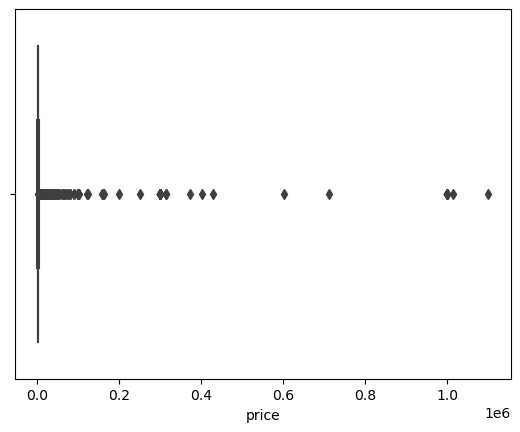

In [99]:
sns.boxplot(x = df_airbnb['price'])

plt.show()

In [100]:
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        # interquantile range

  return lower_range,upper_range

In [102]:
lower_bound,upper_bound = iqr_technique(df_airbnb['price'])

df_airbnb = df_airbnb[(df_airbnb.price>lower_bound) & (df_airbnb.price<upper_bound)]

(14451, 16)


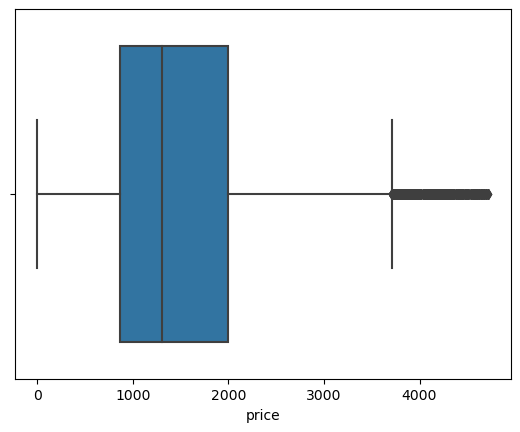

In [104]:
sns.boxplot(x = df_airbnb['price'])
print(df_airbnb.shape)

In [105]:
print(df_airbnb['price'].max())

4720


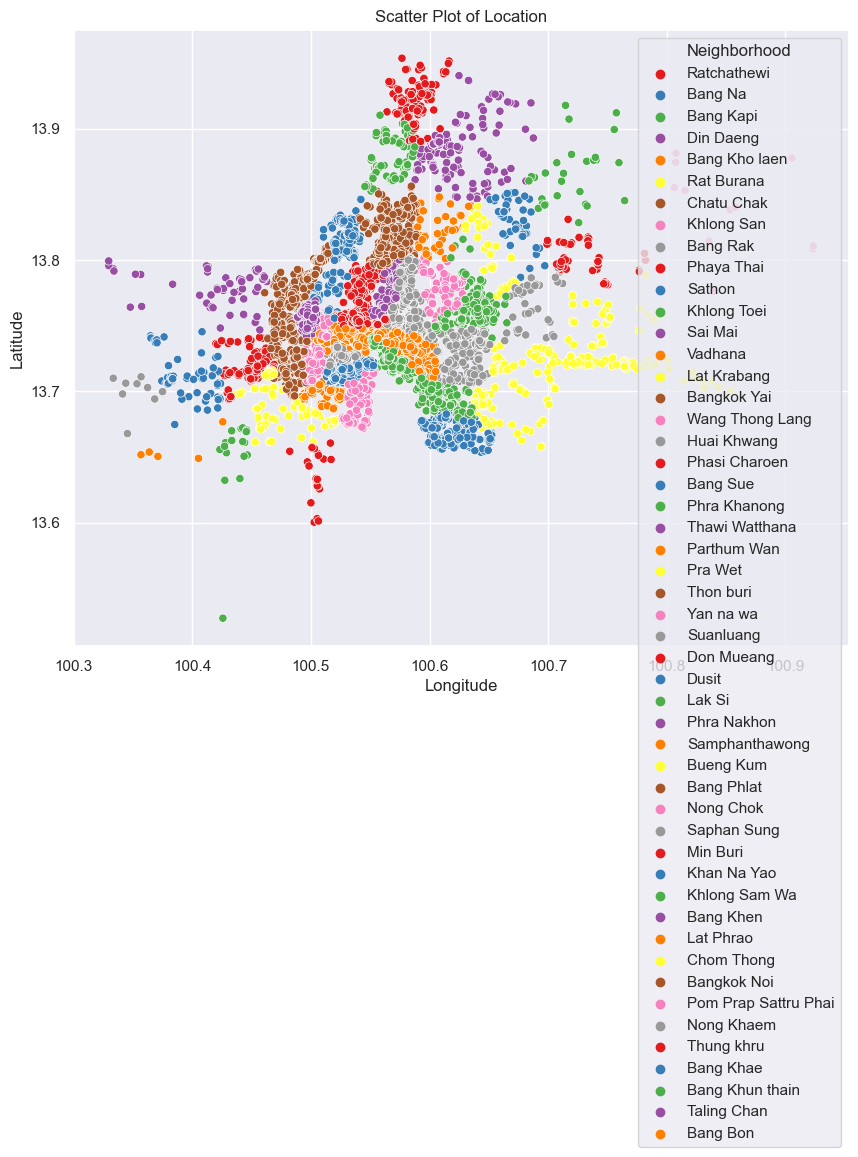

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import mplcursors

# Create a scatter plot using Seaborn
fig1 = plt.figure(figsize=(10, 8))  # Increase the figsize to make the figure larger
scatter = sns.scatterplot(data=df_airbnb, x='longitude', y='latitude', hue='neighbourhood', palette='Set1')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Location')

# Create a legend for the neighborhoods
plt.legend(title='Neighborhood', loc='upper right')

# Convert the scatter plot's data to a format mplcursors can work with
cursor = mplcursors.cursor(scatter, hover=True)

# Define a function to show neighborhood information
def on_hover(sel):
    x, y, _ = sel.target
    point = gpd.GeoDataFrame({'geometry': [gpd.points_from_xy([x], [y])]}, crs=neighborhoods.crs)
    neighborhood = gpd.sjoin(point, neighborhoods, how='left', op='within')
    if not neighborhood.empty:
        sel.annotation.set_text("Neighborhood: " + neighborhood['neighborhood_name'].values[0])
    else:
        sel.annotation.set_text("")

cursor.connect("add", on_hover)

# Show the plot
plt.show()

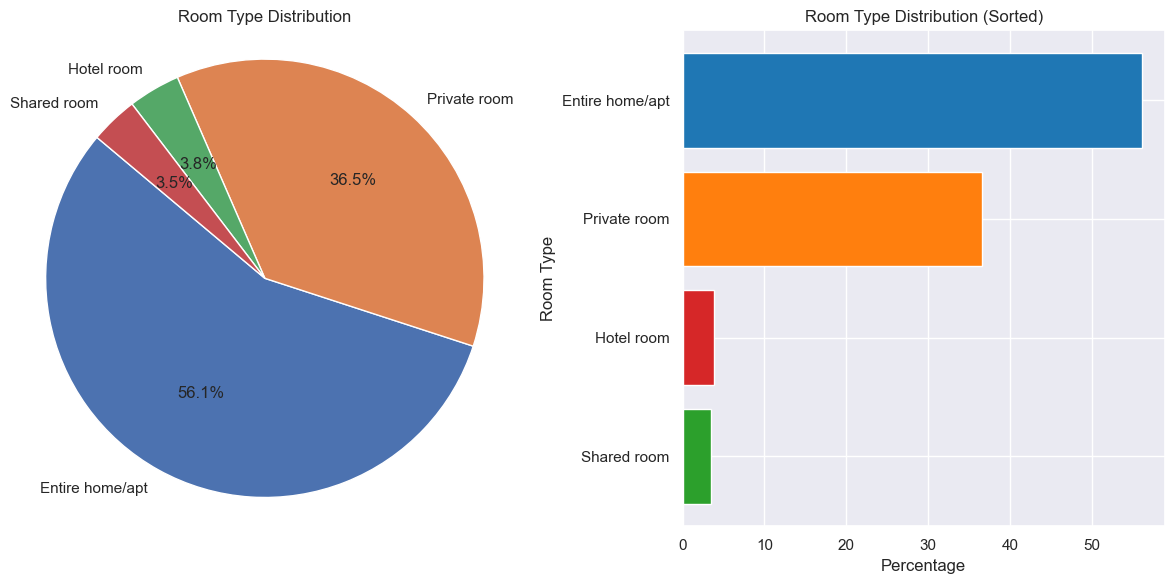

In [200]:
# Group the data by room_type and calculate the counts
room_type_counts = df_airbnb['room_type'].value_counts()

# Calculate the percentage distribution
total_rooms = room_type_counts.sum()
room_type_percentages = (room_type_counts / total_rooms) * 100

# Sort the room types and percentages
sorted_indices = room_type_percentages.sort_values(ascending=True).index
sorted_percentages = room_type_percentages[sorted_indices]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot the pie chart on the first subplot
ax1.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Room Type Distribution')

# Define custom colors (darker shades)
custom_colors = ['#2ca02c','#d62728', '#ff7f0e','#1f77b4' ]

# Plot the horizontal bar plot on the second subplot
bars = ax2.barh(sorted_indices, sorted_percentages, color=custom_colors)
ax2.set_xlabel('Percentage')
ax2.set_ylabel('Room Type')
ax2.set_title('Room Type Distribution (Sorted)')

# Adjust layout for better spacing
plt.tight_layout()

# Display both plots
plt.show()

Grafik 'Room Type Distribustion' memperlihatkan bahwa type_room Entire home/apt memiliki jumlah persentase  yang paling besar, yaitu 56.1%, kemudian diikuti oleh Private room dengan 36.5%, dan Hotel room dengan 3.8%, serta Shared room dengan 3.5%.
Terlihat dengan banyaknya tersedia type_room Entire home/apt dan Private room menunjukkan bahwa AirBnB yang bersifat private lebih menarik bagi masyarakat Bangkok, karena pada dasarnya penjual (dalam hal ini AirBnB) akan mengikuti demand dari pangsa pasar. Hal tersebut berdampak pada banyaknya jumlah AirBnB dengan type_room Entire home/apt dan Private Room.

<Figure size 800x600 with 0 Axes>

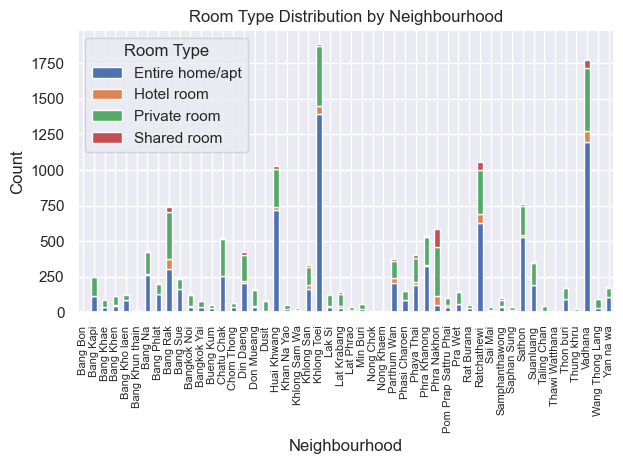

In [211]:
import matplotlib.pyplot as plt

# Group the data by neighbourhood and room_type, then count the occurrences
grouped = df_airbnb.groupby(['neighbourhood', 'room_type']).size().unstack()

# Plot the bar plot
fig3 = plt.figure(figsize=(8, 6))
ax = grouped.plot(kind='bar', stacked=True)
plt.title('Room Type Distribution by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')

# Customize x-axis tick labels font size
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, rotation=90)

plt.legend(title='Room Type')
plt.tight_layout()

# Show the plot (optional)
plt.show()


Pada Grafik 'Room Type Distribution by Neighbourhood' memperlihatkan bahwa perbandingan antar type_room di antar neighbourhood memiliki rasio yang relatif sama. Hal tersebut ditunjukkan dengan perbedaan warna yang diperlihatkan pada grafik. Perbandingan antar type_room yang berbeda dengan neighbourhood lain adalah neighbourhood Phra Nakhon. Hal tersebut dapat terjadi dikarenakan Phra Nakhon merupakan wilayah yang memiliki luas yang kecil dan merupakan salah satu neighbourhood wisata yang ada di Bangkok. Lainhalnya dengan Khlong Toei yang merupakan metropolitan, sehingga masyarakat cenderung membutuhkan type_room Entire home/apt.

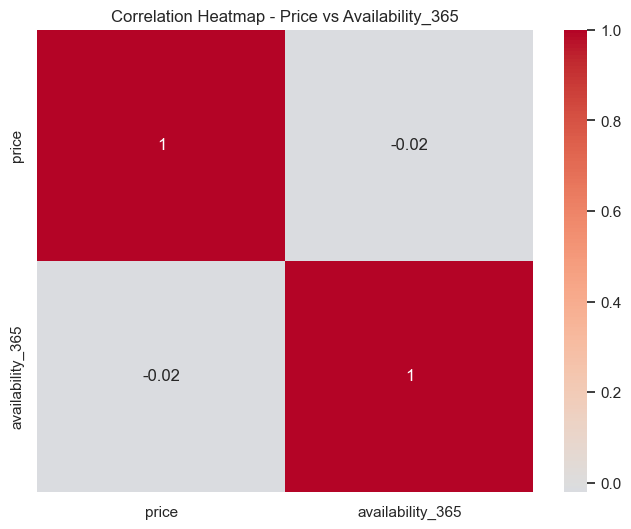

In [213]:
# Subset the DataFrame to include only 'price' and 'availability_365'
subset = df_airbnb[['price', 'availability_365']]

# Calculate the correlation matrix for the subset
correlation_matrix = subset.corr()

# Plot a heatmap of the correlation matrix
fig4 = plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - Price vs Availability_365')
plt.show()

Koefisien korelasi menunjukkan angka -0.02. Angka tersebut menyatakan bahwa korelasi antara price dan availability_365 sangat lemah. Dapat dikatakan bahwa masing-masing data merupakan independen dan tidak saling mempengaruhi antara satu dengan yang lainnya.

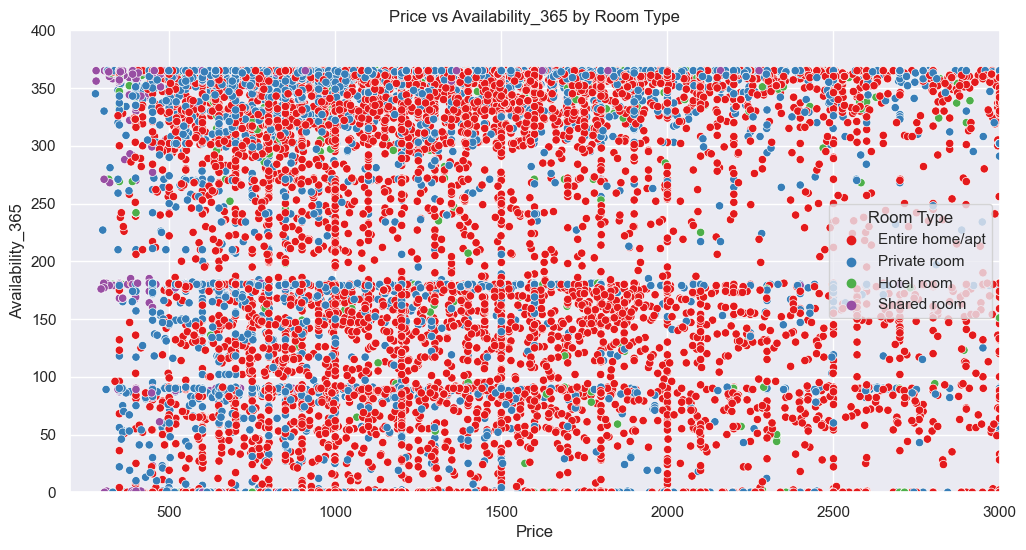

In [215]:
# Create a scatter plot of price vs availability_365
fig5 = plt.figure(figsize=(12, 6))
sns.scatterplot(df_airbnb, x='price', y='availability_365', hue='room_type', palette='Set1')
plt.title('Price vs Availability_365 by Room Type')
plt.xlabel('Price')
plt.ylabel('Availability_365')

# Set custom limits for x and y axes
plt.xlim(200, 3000)  # Adjust the values according to your data
plt.ylim(0, 400)  # Adjust the values according to your data

plt.legend(title='Room Type')
plt.show()

Text(0.5, 1.0, 'Distribution of Airbnb Prices')

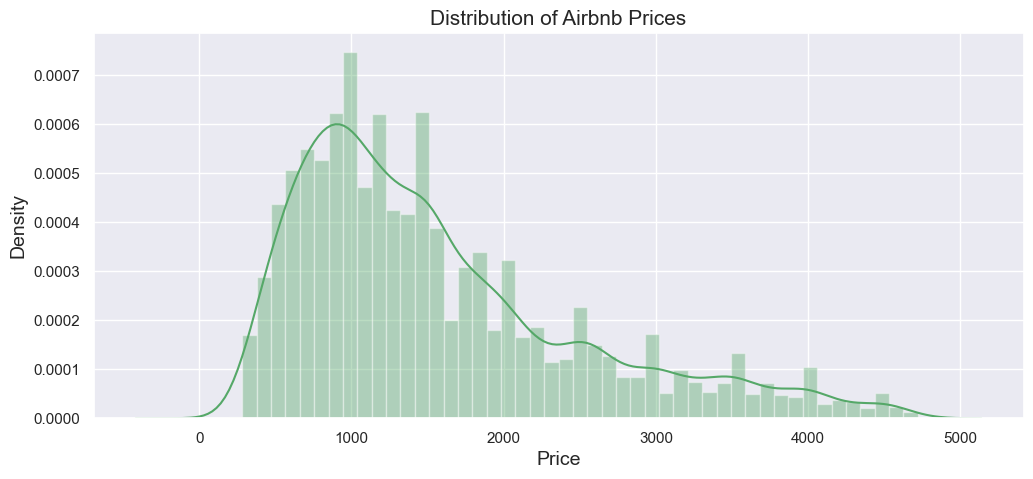

In [189]:
# Create a figure with a custom size
plt.figure(figsize=(12, 5))

# Set the seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

# Create a histogram of the 'price' column of the Airbnb_df dataframe
# using sns distplot function and specifying the color as red
sns.distplot(df_airbnb['price'],color=('g'))

# Add labels to the x-axis and y-axis
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a title to the plot
plt.title('Distribution of Airbnb Prices',fontsize=15)

Rentang harga AirBnB Bangkok berkisar antara 300 - 4700, dengan mayoritas berada pada rentang harga 600 - 1500.
Terdapat lebih sedikit AirBnB pada kisaran harga 2500 ke atas, dikarenakan pada rentang tersebut jumlah AirBnB terus menurun.

Text(0, 0.5, 'total listings counts')

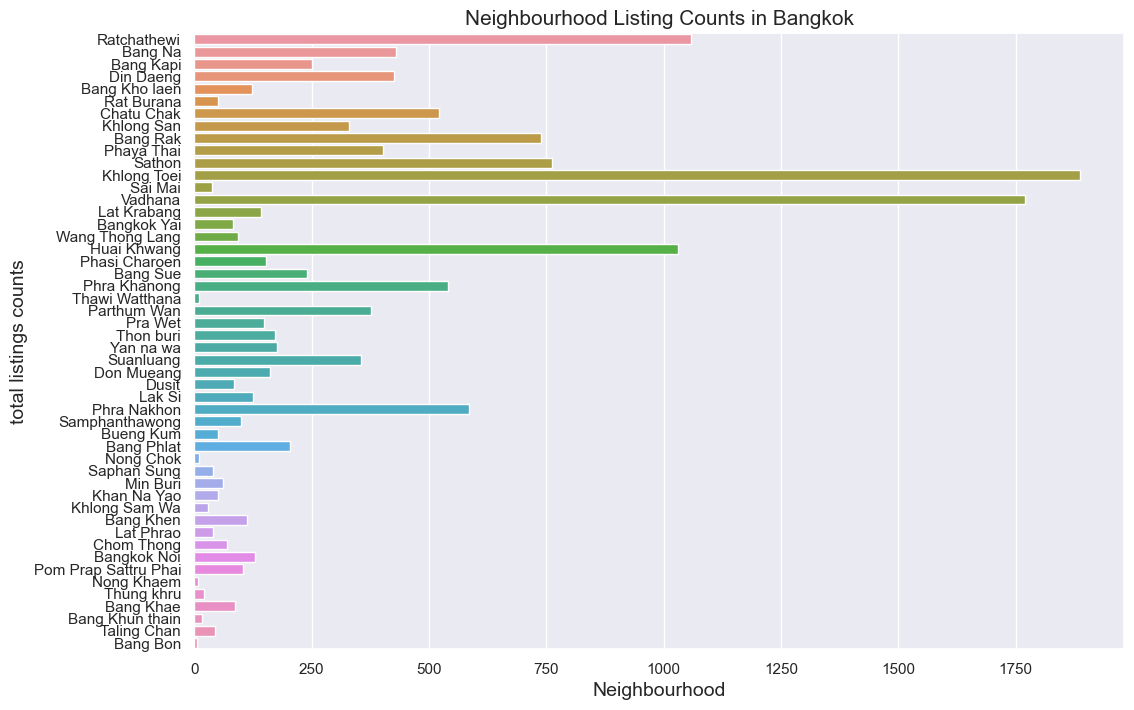

In [224]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a countplot of the neighbourhood group data
sns.countplot(df_airbnb, y = 'neighbourhood')

# Set the title of the plot
plt.title('Neighbourhood Listing Counts in Bangkok', fontsize=15)

# Set the x-axis label
plt.xlabel('Neighbourhood', fontsize=14)

# Set the y-axis label
plt.ylabel('total listings counts', fontsize=14)

In [364]:
counts = df_airbnb['neighbourhood'].value_counts()
Top_Neighborhood_group = counts.reset_index()
Top_Neighborhood_group.columns = ['neighbourhood', 'qty']
Top_Neighborhood_group.head(5)

,neighbourhood,qty
0,Khlong Toei,1887
1,Vadhana,1770
2,Ratchathewi,1059
3,Huai Khwang,1031
4,Sathon,762


AirBnB yang berada di Khlong Toei memiliki jumlah terbanyak, diikuti oleh Vadhana, Ratchathewi, dan Huai Khwang. Dilihat dari  id.city-facts bahwa Khlong Toei memiliki penduduk 180 ribu jiwa dalam 13.3 km2, hal tersebut dapat menjadi salah satu faktor yang mempengaruhi banyaknya jumlah AirBnB yang ada di Khlong Toei. Ditambah juga bahwa Khlong Toei merupakan daerah metropolitan yang ada di Bangkok, sehingga masyarakat dari luar Khlong Toei pun banyak mendatangi Khlong Toei.

In [365]:
grouped = df_airbnb.groupby('room_type')['price'].mean()
room_type_avg_price = grouped.reset_index()
room_type_avg_price = round(room_type_avg_price.rename(columns={'price': 'avg_price'}),2)
room_type_avg_price[['room_type', 'avg_price']].sort_values('avg_price', ascending=False)

,room_type,avg_price
0,Entire home/apt,1705.51
1,Hotel room,1688.18
2,Private room,1421.80
3,Shared room,639.34


Text(0.5, 1.0, 'Average Price by room_type')

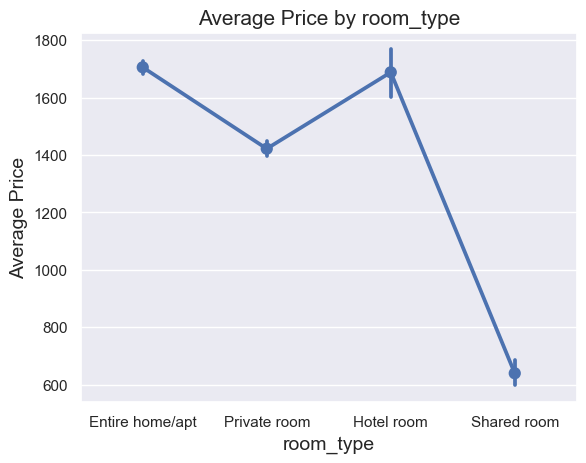

In [366]:
#import mean function from the statistics module 
from statistics import mean

# Create the point plot
sns.pointplot(x = 'room_type', y='price', data=df_airbnb, estimator = np.mean)

# Add axis labels and a title
plt.xlabel('room_type',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('Average Price by room_type',fontsize=15)

Average price berdasarkan room_type menunjukkan bahwa harga Entire home/apt memiliki harga yang paling tinggi, disusul oleh Hotel room, Private room, kemudian Shared room.

In [352]:
# Group the Airbnb dataset by neighborhood group and calculate the mean of each group
grouped1 = df_airbnb.groupby('room_type')['number_of_reviews'].sum()

# Reset the index of the grouped dataframe so that the neighborhood group becomes a column
nor_room_type = grouped1.reset_index()

# Rename the "price" column to "avg_price"
nor_room_type= round(nor_room_type.rename(columns={'number_of_reviews': 'number_of_reviews'}),2)

# Select only the "neighbourhood" and "avg_price" columns
nor_room_type[['room_type', 'number_of_reviews']]

,room_type,number_of_reviews
0,Entire home/apt,183378
1,Hotel room,12096
2,Private room,48858
3,Shared room,2635


Text(0.5, 1.0, 'number_of_reviews by room_type')

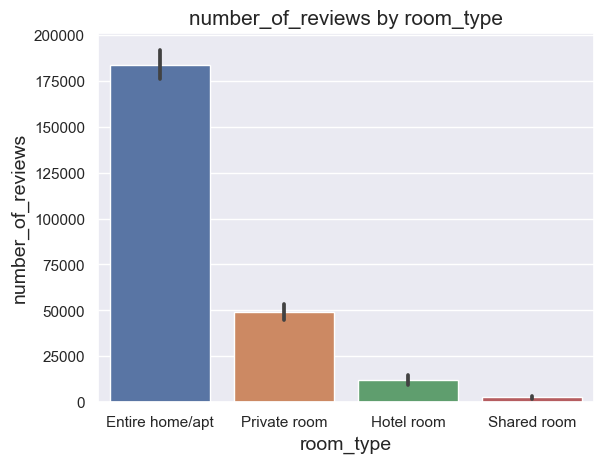

In [353]:
#import mean function from the statistics module 
from statistics import mean

# Create the point plot
sns.barplot(x = 'room_type', y='number_of_reviews', data=df_airbnb, estimator = np.sum)

# Add axis labels and a title
plt.xlabel('room_type',fontsize=14)
plt.ylabel('number_of_reviews',fontsize=14)
plt.title('number_of_reviews by room_type',fontsize=15)

Jumlah review untuk setiap room_type ditunjukkan pada bar plot di atas. Meskipun memiliki average_price paling tinggi, Entire home/apt memiliki jumlah review paling banyak. Hal tersebut didukung oleh jumlah AirBnB dengan room_type tersebut di Bangkok yang lebih banyak daripada room_type yang lain. Berbeda dengan Hotel room, room_type ini memiliki average_price yang tinggi namun jumlah review yang rendah. Dengan demikian dapat dikatakan bahwa average_price berdasarkan room_type berkorelasi lemah dengan jumlah review berdasarkan room_type.